In [2]:
# import os
# import scipy.io as sio
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

사용 데이터 경로  
C:\Users\ChoiSeongHyeon\Desktop\Dataset\UOS\BearingType_DeepGrooveBall\SamplingRate_16000

In [3]:
# import scipy.io

# # MATLAB 파일 경로
# file_path = r"C:\Users\ChoiSeongHyeon\Desktop\Dataset\UOS\BearingType_DeepGrooveBall\SamplingRate_16000\RotatingSpeed_1000\H_B_16_6204_1000.mat"

# def print_mat_contents(file_path):
#     try:
#         # MATLAB 파일 로드
#         mat_contents = scipy.io.loadmat(file_path)
        
#         # MATLAB 파일 내용 출력
#         print("MATLAB 파일의 키 목록:")
#         for key in mat_contents.keys():
#             # 내부 데이터 구조를 확인하기 위해 데이터의 타입과 샘플 출력
#             print(f"- {key}: {type(mat_contents[key])}")
#             if isinstance(mat_contents[key], (list, dict, tuple)):
#                 print(f"  샘플 데이터: {mat_contents[key][:2]}")
#             elif hasattr(mat_contents[key], 'shape'):
#                 print(f"  데이터 형상(shape): {mat_contents[key].shape}")
#             else:
#                 print(f"  값: {mat_contents[key]}")

#     except Exception as e:
#         print(f"MATLAB 파일을 읽는 중 오류가 발생했습니다: {e}")

# # 함수 실행
# print_mat_contents(file_path)


# Cell 1. 데이터 Sampling  
- Origin Data -> Test, Validation, Train (6:2:2)로 구분
- SAMPLE_SIZE : 2,048, SHIFT_SIZE : 1,024

Origin 파일의 길이 : 1280,000  
Shift Size : 1024  
따라서, 1,250개의 샘플 생성되어야 함.

In [4]:
# pip install scipy numpy tqdm

In [5]:
# import os
# import numpy as np
# import scipy.io
# import pandas as pd
# from tqdm import tqdm

# # 기본 경로 설정
# BASE_DIR = r"C:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\Dataset\UOS"
# FAULT_TYPES = ["H", "B", "IR", "OR"]
# SPLIT_RATIOS = (0.6, 0.2, 0.2)  # Train: 60%, Val: 20%, Test: 20%
# SAMPLE_SIZE = 2048
# SHIFT_SIZE = 1024

# def load_mat_file(file_path):
#     """ .mat 파일에서 'Data' 키를 가진 데이터를 불러옴 """
#     mat_data = scipy.io.loadmat(file_path)
#     if 'Data' in mat_data:
#         return mat_data['Data'].flatten()  # 1D 배열로 변환
#     else:
#         raise KeyError(f"'Data' key not found in {file_path}")

# def split_data(data, split_ratios):
#     """ 데이터를 Train, Validation, Test로 분할 """
#     total_len = len(data)
#     train_end = int(total_len * split_ratios[0])
#     val_end = train_end + int(total_len * split_ratios[1])

#     train_data = data[:train_end]
#     val_data = data[train_end:val_end]
#     test_data = data[val_end:]

#     return train_data, val_data, test_data

# def save_csv_file(file_path, data):
#     """ 데이터를 CSV 파일로 저장 (단일 열 형태) """
#     df = pd.DataFrame(data)  # ✅ 단일 열(column) 형태로 변환
#     df.to_csv(file_path, index=False, header=False)  # ✅ 열 이름 없이 저장

# def create_samples(data, save_dir, base_filename):
#     """ 데이터를 2048 크기로 1024씩 이동하며 개별 CSV 파일로 저장 """
#     os.makedirs(save_dir, exist_ok=True)
#     num_samples = int((len(data) / SHIFT_SIZE) - 1)

#     for i in range(num_samples):
#         start = i * SHIFT_SIZE
#         end = start + SAMPLE_SIZE
#         if end > len(data):  
#             break

#         sample = data[start:end]
#         sample_filename = os.path.join(save_dir, f"{base_filename}_{i+1}.csv")
#         save_csv_file(sample_filename, sample)

# def process_fault_type(fault_type):
#     """ 각 Fault Type 폴더의 파일을 처리 """
#     fault_dir = os.path.join(BASE_DIR, fault_type, "Origin")
#     split_dir = os.path.join(BASE_DIR, fault_type, "Train_Val_Test_Split")
#     samples_dir = os.path.join(BASE_DIR, fault_type, "Samples")

#     os.makedirs(split_dir, exist_ok=True)
#     os.makedirs(samples_dir, exist_ok=True)

#     # Origin 폴더 내 모든 .mat 파일 처리
#     for file in tqdm(os.listdir(fault_dir), desc=f"Processing {fault_type}"):
#         if not file.endswith(".mat"):
#             continue

#         file_path = os.path.join(fault_dir, file)
#         base_name = file.replace(".mat", "")

#         try:
#             # .mat 파일 로드
#             data = load_mat_file(file_path)
            
#             # Train, Validation, Test 데이터 분할
#             train_data, val_data, test_data = split_data(data, SPLIT_RATIOS)

#             # Train, Validation, Test 데이터를 CSV 파일로 저장
#             save_csv_file(os.path.join(split_dir, f"{base_name}_Train.csv"), train_data)
#             save_csv_file(os.path.join(split_dir, f"{base_name}_Validation.csv"), val_data)
#             save_csv_file(os.path.join(split_dir, f"{base_name}_Test.csv"), test_data)

#             # Train, Validation, Test 데이터에서 개별 샘플 생성 및 저장
#             create_samples(train_data, samples_dir, f"{base_name}_Train")
#             create_samples(val_data, samples_dir, f"{base_name}_Validation")
#             create_samples(test_data, samples_dir, f"{base_name}_Test")

#         except Exception as e:
#             print(f"Error processing {file}: {e}")

# # 모든 Fault Type에 대해 실행
# for fault in FAULT_TYPES:
#     process_fault_type(fault)

# print("✅ 모든 데이터 처리가 완료되었습니다!")


Train, Validation, Test Sample 확인하기

In [6]:
# import os
# import re
# from collections import defaultdict

# # 데이터셋 경로
# dataset_path = r"C:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\Dataset\UOS"

# # Fault Types
# fault_types = ["B", "H", "IR", "OR"]

# # RPM 및 데이터 유형별 샘플 개수 저장용 딕셔너리
# sample_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

# # 파일명 정규식 패턴
# pattern = re.compile(r"H_(B|H|IR|OR)_16_6204_(\d+)_(Train|Validation|Test)_\d+\.csv")

# # 각 Fault Type 폴더를 순회하며 파일 개수 집계
# for fault in fault_types:
#     samples_path = os.path.join(dataset_path, fault, "Samples")

#     if not os.path.exists(samples_path):
#         print(f"경로 없음: {samples_path}")
#         continue

#     for filename in os.listdir(samples_path):
#         match = pattern.match(filename)
#         if match:
#             fault_type, rpm, data_type = match.groups()
#             sample_counts[fault_type][rpm][data_type] += 1

# # 결과 출력
# for fault in fault_types:
#     print(f"\nFault Type: {fault}")
#     for rpm in ["600", "800", "1000", "1200", "1400", "1600"]:
#         train_count = sample_counts[fault][rpm]["Train"]
#         val_count = sample_counts[fault][rpm]["Validation"]
#         test_count = sample_counts[fault][rpm]["Test"]
#         print(f"  RPM {rpm}: Train {train_count}, Validation {val_count}, Test {test_count}")


# Cell 2. Labelling  
H : 0, IR : 1, OR : 2, B : 3  

# Cell 3. WDCNN

In [7]:
# UOS_Winning.ipynb

import torch

# GPU 사용 여부 확인 및 출력
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if torch.cuda.is_available():
    print("GPU device name:", torch.cuda.get_device_name(0))
else:
    print("GPU not available, using CPU.")

# 필요한 모듈 임포트
from torch.utils.data import DataLoader
from Model import WDCNN
from utils import (
    UOSDataset, 
    get_dataloaders, 
    train_model_original, 
    evaluate_model_original, 
    fine_tune_and_evaluate, 
    plot_validation_accuracies, 
    evaluate_pruned_models,
    fine_tune_and_evaluate_structured,
    evaluate_structured_models
)

Using device: cuda
GPU device name: NVIDIA GeForce RTX 4060 Laptop GPU


In [8]:
############################################
# 1. 원본 모델 학습 및 평가 (Option 1)
############################################
print("\n=== Original Model Training ===")
# UOSDataset을 직접 사용하여 학습 데이터셋, 검증 데이터셋 로드
train_dataset = UOSDataset("Train")
val_dataset = UOSDataset("Validation")
test_dataset = UOSDataset("Test")

# # 여러 배치 크기에 대해 원본 모델 학습 수행
#     train_model_original(
#     train_dataset, val_dataset, 
#     batch_sizes=[32, 64, 128, 256],
#     num_epochs=100, learning_rate=0.01, patience=10
# )


=== Original Model Training ===


c:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\UOS\utils.py:58: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  self.data = torch.tensor(self.data, dtype=torch.float32).unsqueeze(1)



=== Original Model Evaluation ===

📌 Classification Report:
              precision    recall  f1-score   support

           H       1.00      1.00      1.00      1494
          IR       1.00      1.00      1.00      1494
          OR       1.00      0.98      0.99      1494
           B       0.98      1.00      0.99      1494

    accuracy                           0.99      5976
   macro avg       0.99      0.99      0.99      5976
weighted avg       0.99      0.99      0.99      5976



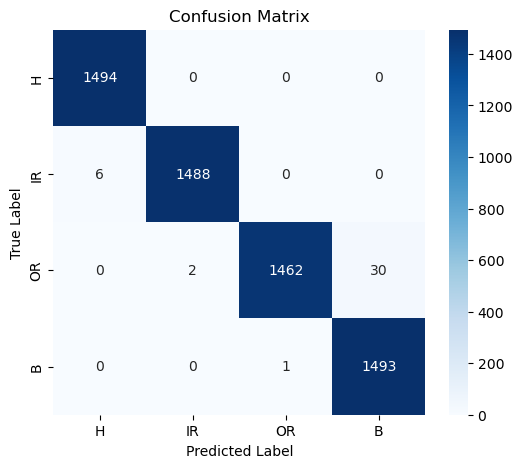

In [9]:
# 학습이 완료된 원본 모델(best_overall_model.pth)은
# UOS\Parameters 폴더에 저장되어 있다고 가정합니다.
print("\n=== Original Model Evaluation ===")
model = WDCNN().to(device)
# best_overall_model.pth의 경로 (환경에 맞게 수정)
best_model_path = r"C:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\UOS\Parameters\best_overall_model.pth"
checkpoint = torch.load(best_model_path, map_location=device)
if isinstance(checkpoint, dict) and "model_state_dict" in checkpoint:
    model.load_state_dict(checkpoint["model_state_dict"])
else:
    model.load_state_dict(checkpoint)

# 테스트 데이터셋의 DataLoader 구성 (최적 배치 크기 사용)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
evaluate_model_original(model, test_loader, device)

# Cell 4. Pruning 적용

## Cell 4.1 Unstructured Pruning

In [10]:
############################################
# 2. Unstructured Pruning 실험 (Option 2)
############################################
print("\n=== Unstructured Pruning Fine-Tuning ===")
# get_dataloaders를 사용하여 배치 크기 64의 DataLoader 생성
train_loader, val_loader, test_loader = get_dataloaders(batch_size=64)

# Unstructured Pruning 실험 실행 (pruning 비율 20%, 40%, 60%, 80%)
pruning_ratios = [0.2, 0.4, 0.6, 0.8]
experiment_results = fine_tune_and_evaluate(pruning_ratios, train_loader, val_loader, num_epochs=100)


=== Unstructured Pruning Fine-Tuning ===

🔹 Fine-tuning with Pruning Amount: 0.2
Epoch 1: Pruning 0.2, Train Acc: 0.9997, Val Acc: 0.9995
Epoch 2: Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.9992
Epoch 3: Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.9995
Epoch 4: Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.9992
Epoch 5: Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.9993
Epoch 6: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9995
Epoch 7: Pruning 0.2, Train Acc: 0.9998, Val Acc: 0.9995
Epoch 8: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9995
Epoch 9: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9993
Epoch 10: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9995
Epoch 11: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9995
Epoch 12: Pruning 0.2, Train Acc: 1.0000, Val Acc: 0.9995
Epoch 13: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9995
Epoch 14: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9995
Epoch 15: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9995
Epoch 16: Pruning 0.2, Train Acc: 0.9999, Val Acc: 0.9993

KeyboardInterrupt: 


=== Plotting Validation Accuracies ===


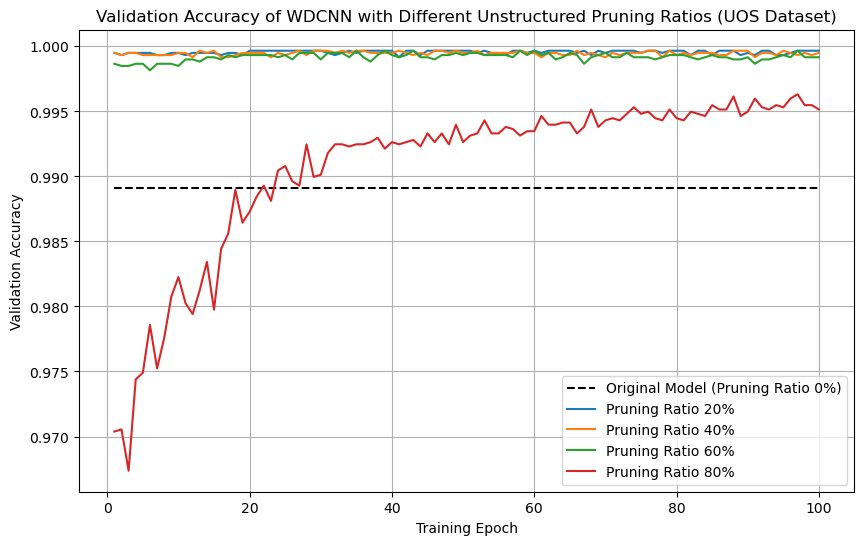

In [ ]:
############################################
# 3. 원본 모델 vs Pruned 모델 Validation Accuracy Plot (Option 2-2)
############################################
print("\n=== Plotting Validation Accuracies ===")
original_model = WDCNN().to(device)
original_model.load_state_dict(torch.load(best_model_path, map_location=device))
num_epochs_plot = 100
original_val_accuracies = []
with torch.no_grad():
    for epoch in range(num_epochs_plot):
        original_model.eval()
        correct = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = original_model(inputs)
            correct += (outputs.argmax(dim=1) == labels).sum().item()
        original_val_accuracies.append(correct / len(val_loader.dataset))
plot_validation_accuracies(original_val_accuracies, experiment_results, num_epochs_plot)

In [ ]:
############################################
# 4. Pruned 모델들의 Test 평가 및 결과 비교 (Option 3)
############################################
print("\n=== Test Evaluation of Pruned Models ===")
results_df = evaluate_pruned_models(test_loader, experiment_results)
print("Test evaluation results:")
display(results_df)


=== Test Evaluation of Pruned Models ===
Test evaluation results:


,Pruning Ratio,Number of Non-Zero Params,Inference Time (s),Test Accuracy
0,0.0,37308,0.000697,0.999665
1,0.2,30005,0.000749,0.999833
2,0.4,22703,0.000719,0.999665
3,0.6,15401,0.000845,0.999665
4,0.8,8099,0.000830,0.996988


## Cell 4.2 Structured Pruning

In [ ]:
############################################
# [Option 3] Structured Pruning 실험 및 평가
############################################
print("\n=== Structured Pruning Fine-Tuning ===")
structured_experiment_results = fine_tune_and_evaluate_structured(pruning_ratios, train_loader, val_loader, num_epochs=100, n=2, dim=0)


=== Structured Pruning Fine-Tuning ===

🔹 Structured Fine-tuning with Pruning Amount: 0.2
Epoch 1: Structured Pruning 0.2, Train Acc: 0.9223, Val Acc: 0.9185
Epoch 2: Structured Pruning 0.2, Train Acc: 0.9342, Val Acc: 0.9441
Epoch 3: Structured Pruning 0.2, Train Acc: 0.9457, Val Acc: 0.9572
Epoch 4: Structured Pruning 0.2, Train Acc: 0.9604, Val Acc: 0.9665
Epoch 5: Structured Pruning 0.2, Train Acc: 0.9680, Val Acc: 0.9669
Epoch 6: Structured Pruning 0.2, Train Acc: 0.9773, Val Acc: 0.9931
Epoch 7: Structured Pruning 0.2, Train Acc: 0.9823, Val Acc: 0.9953
Epoch 8: Structured Pruning 0.2, Train Acc: 0.9867, Val Acc: 0.9955
Epoch 9: Structured Pruning 0.2, Train Acc: 0.9898, Val Acc: 0.9973
Epoch 10: Structured Pruning 0.2, Train Acc: 0.9928, Val Acc: 0.9967
Epoch 11: Structured Pruning 0.2, Train Acc: 0.9945, Val Acc: 0.9983
Epoch 12: Structured Pruning 0.2, Train Acc: 0.9961, Val Acc: 0.9988
Epoch 13: Structured Pruning 0.2, Train Acc: 0.9962, Val Acc: 0.9990
Epoch 14: Structured 

,Pruning Ratio,Number of Non-Zero Params,Inference Time (s),Test Accuracy
0,0.0,37308,0.000696,0.999665
1,0.2,29972,0.000734,0.999833
2,0.4,22604,0.000702,0.749163
3,0.6,15500,0.000768,0.738286
4,0.8,8132,0.000700,0.373661


In [ ]:
############################################
# [Option 3-2] Structured Pruning Validation Accuracy Plot
############################################
print("\n=== Plotting Structured Pruning Validation Accuracies ===")
# 원본 모델 로드 (최적 모델 경로: best_overall_model.pth)
best_model_path = r"C:\Users\ChoiSeongHyeon\Desktop\WinningT\Winning Ticket\MyWinningTicket\UOS\Parameters\best_overall_model.pth"
original_model = WDCNN().to(device)
original_model.load_state_dict(torch.load(best_model_path, map_location=device))

num_epochs_plot = 100  # 예시: 100 에포크 기준
original_val_accuracies_structured = []

with torch.no_grad():
    for epoch in range(num_epochs_plot):
        original_model.eval()
        correct = 0
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = original_model(inputs)
            correct += (outputs.argmax(dim=1) == labels).sum().item()
        original_val_accuracies_structured.append(correct / len(val_loader.dataset))

# structured_experiment_results는 fine_tune_and_evaluate_structured() 함수의 반환값입니다.
plot_validation_accuracies(original_val_accuracies_structured, structured_experiment_results, num_epochs_plot)



=== Plotting Structured Pruning Validation Accuracies ===


NameError: name 'WDCNN' is not defined

In [ ]:
print("\n=== Test Evaluation of Structured Pruned Models ===")
structured_results_df = evaluate_structured_models(test_loader, structured_experiment_results)
print("Structured Pruning Test evaluation results:")
display(structured_results_df)